In [1]:
library(dplyr)
library(class)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Análisis exploratorio de datos.

In [2]:
dat <- read.csv('Prostate_Cancer.csv')
head(dat)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,M,23,12,151,954,0.143,0.278,0.242,0.079
2,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
3,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
4,4,M,14,16,78,386,0.070,0.284,0.260,0.097
5,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
6,6,B,25,25,83,477,0.128,0.170,0.209,0.076


Se elimina la columna id, ya que no representa un predictor.

In [3]:
dat <- dat %>% select(-id)
str(dat)

'data.frame':	100 obs. of  9 variables:
 $ diagnosis_result : chr  "M" "B" "M" "M" ...
 $ radius           : int  23 9 21 14 9 25 16 15 19 25 ...
 $ texture          : int  12 13 27 16 19 25 26 18 24 11 ...
 $ perimeter        : int  151 133 130 78 135 83 120 90 88 84 ...
 $ area             : int  954 1326 1203 386 1297 477 1040 578 520 476 ...
 $ smoothness       : num  0.143 0.143 0.125 0.07 0.141 0.128 0.095 0.119 0.127 0.119 ...
 $ compactness      : num  0.278 0.079 0.16 0.284 0.133 0.17 0.109 0.165 0.193 0.24 ...
 $ symmetry         : num  0.242 0.181 0.207 0.26 0.181 0.209 0.179 0.22 0.235 0.203 ...
 $ fractal_dimension: num  0.079 0.057 0.06 0.097 0.059 0.076 0.057 0.075 0.074 0.082 ...


### Variable: diagnosis_result

In [4]:
tab_y <- table(dat$diagnosis_result)
tab_y


 B  M 
38 62 

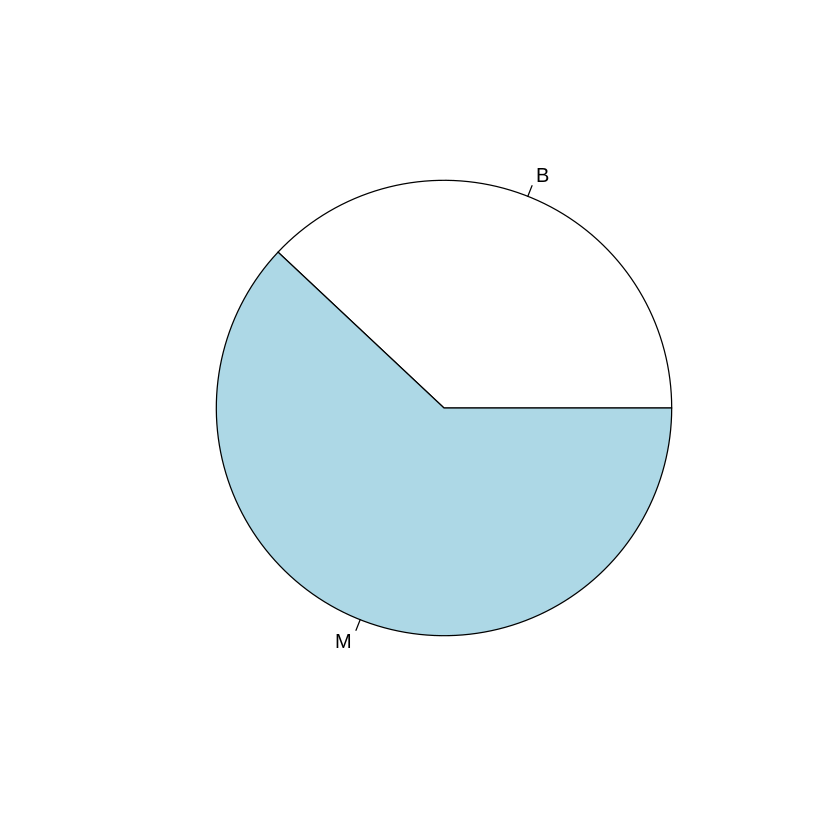

In [5]:
pie(tab_y)

Como se puede observar, de las 100 observaciones, 62 dieron como resultado ser un tumor maligno (canceroso) mientras que el 32 de las observaciones dieron como resultado ser un tumor benigno.

### Variable: radius

In [6]:
summary(dat$radius)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   12.00   17.00   16.85   21.00   25.00 

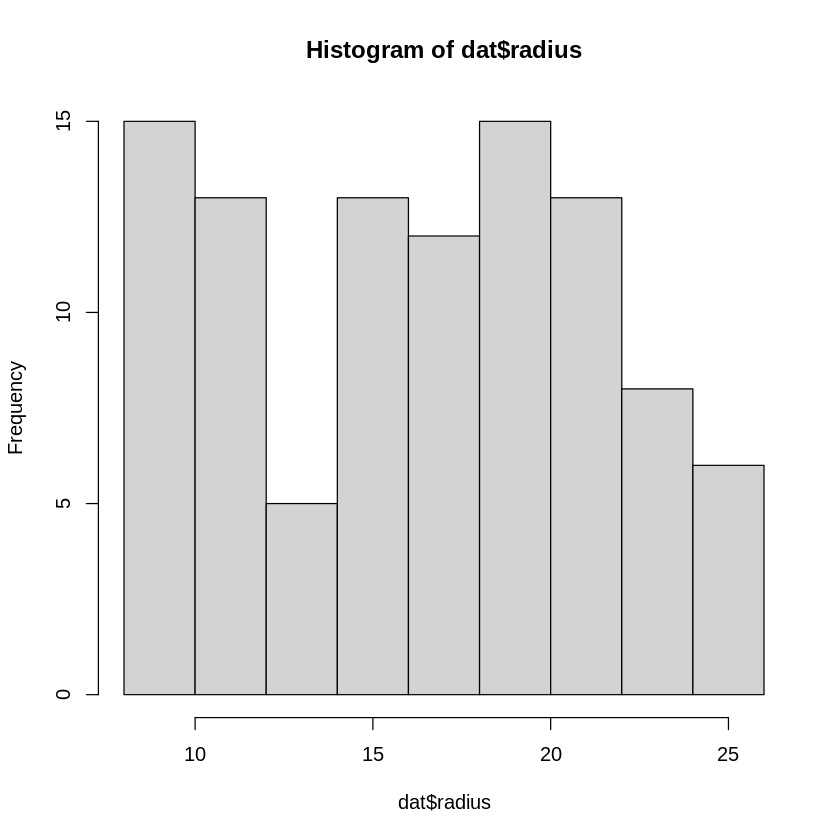

In [7]:
hist(dat$radius)

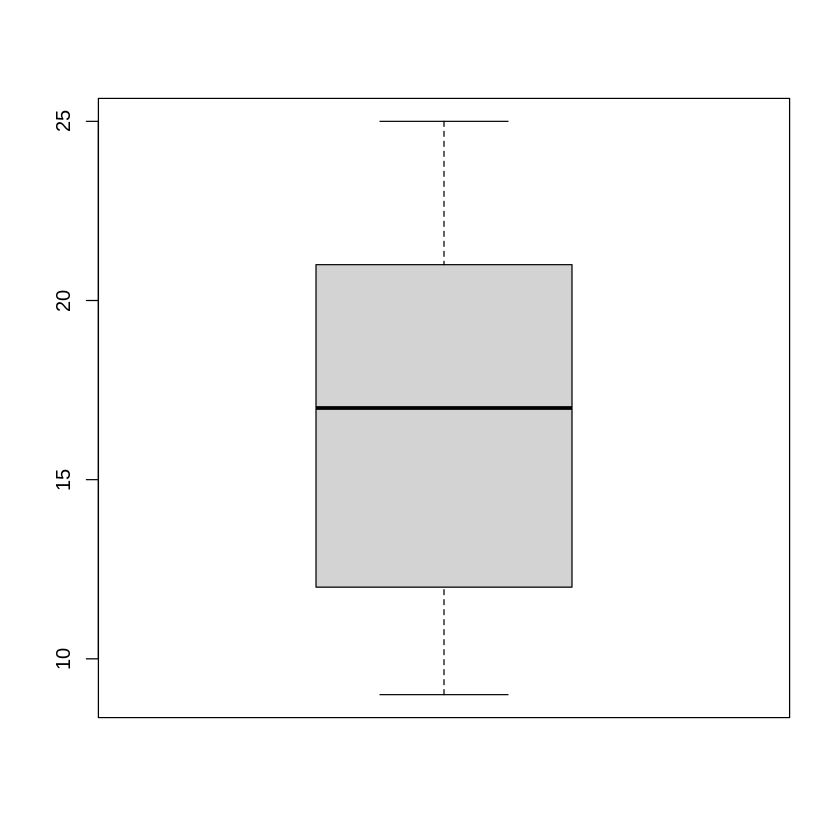

In [8]:
boxplot(dat$radius)

El valor máximo para el radio de 25 indica que la escala podria ser de milésimas, ya que de ser centesimas de metro el radio del tumor sería demasiado grande para este caso.

### Variable: texture

In [9]:
summary(dat$texture)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.00   14.00   17.50   18.23   22.25   27.00 

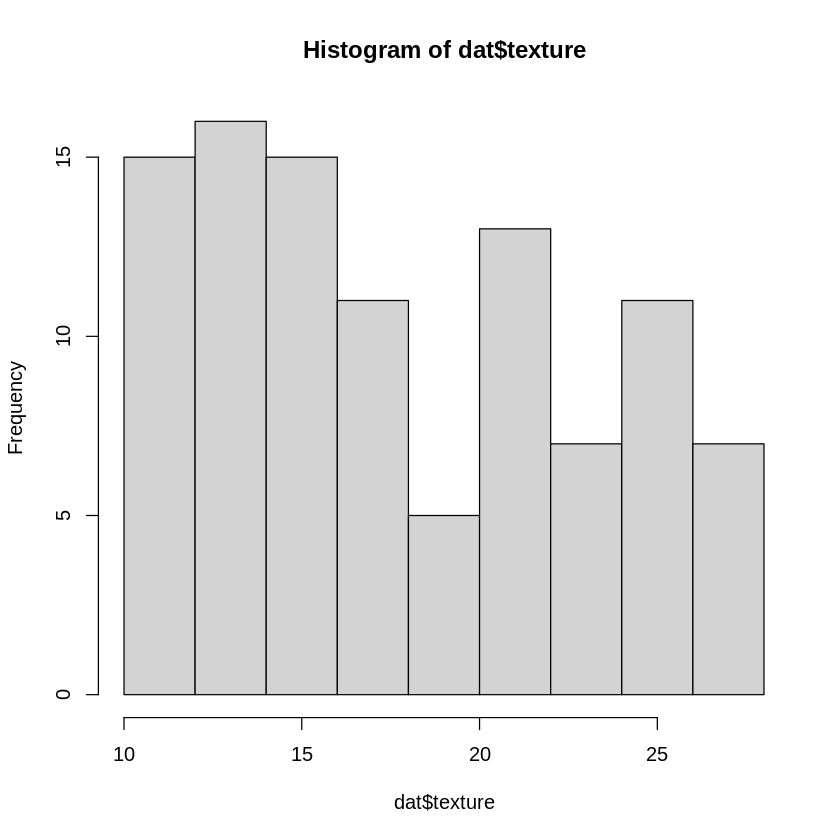

In [10]:
hist(dat$texture)

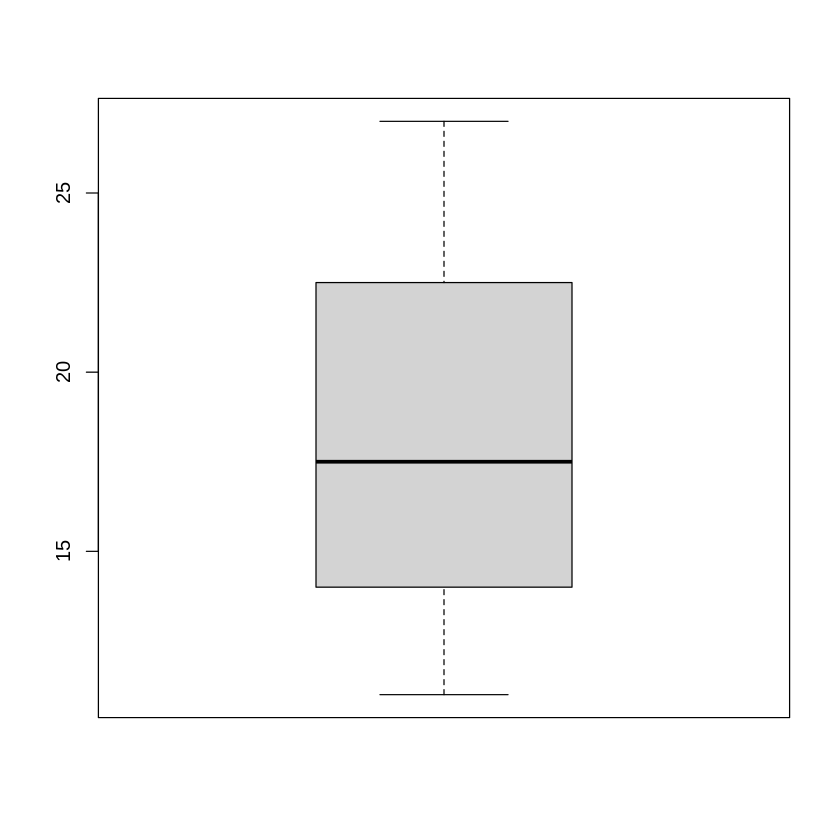

In [11]:
boxplot(dat$texture)

Nuevamente por el rango de valores para la textura, estos sugieren que la escala de la textura es de milésimas.

### Variable: perimeter

In [12]:
summary(dat$perimeter)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  52.00   82.50   94.00   96.78  114.25  172.00 

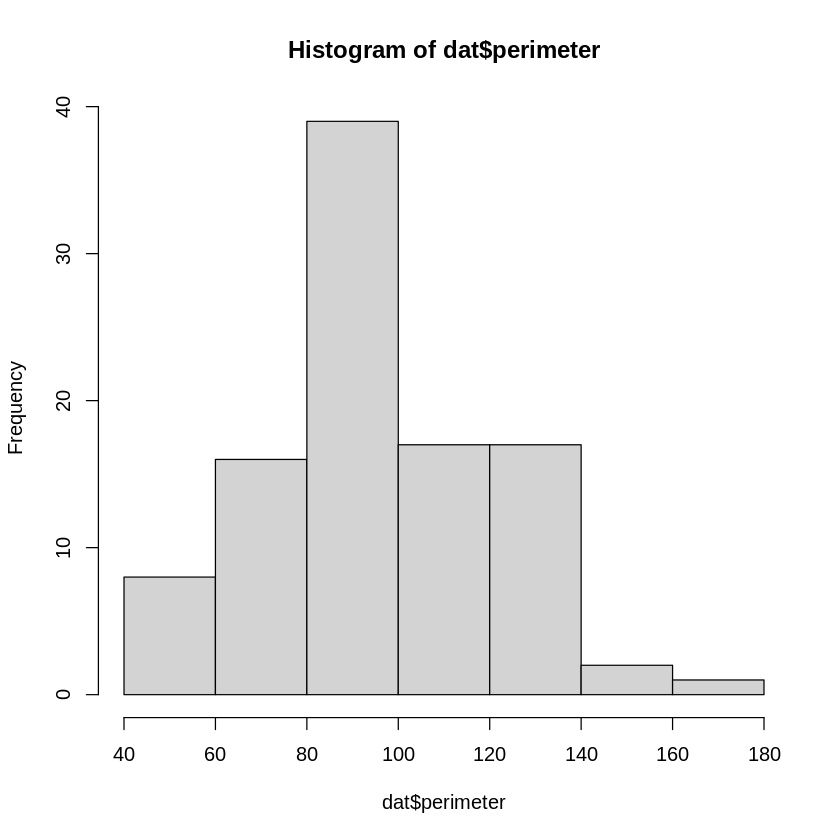

In [13]:
hist(dat$perimeter)

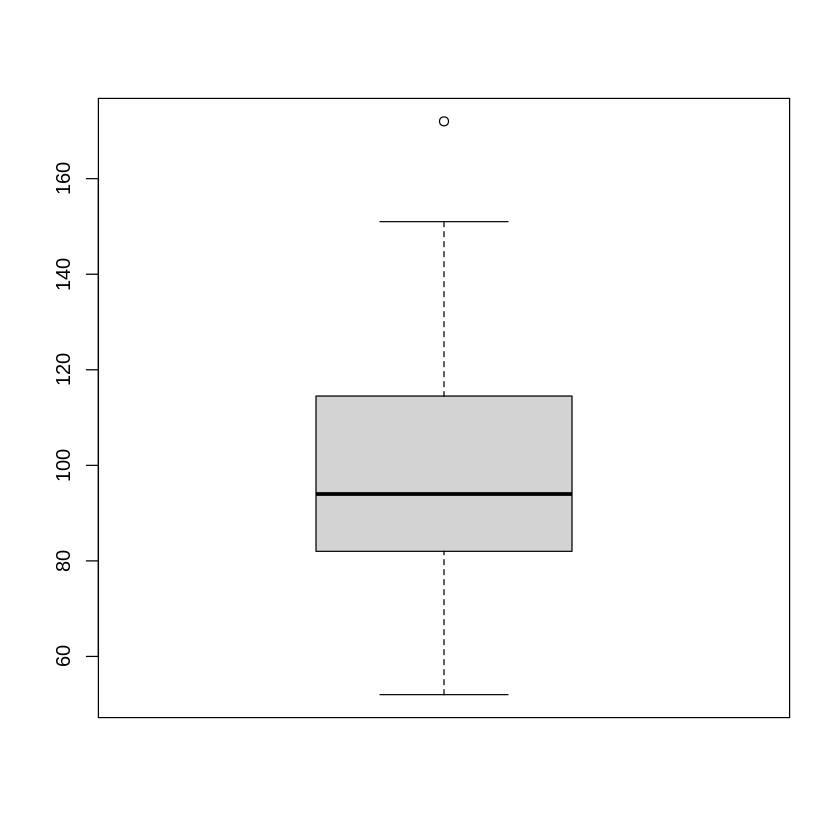

In [14]:
boxplot(dat$perimeter)

Como el valor máximo para el radio es de 25 milímetros (posible escala), asumiendo que el tumor tiene una forma circular perfecta (algo casi imposible pero que sirve de referencia) entonces el perímetro para el radio máximo seria de $P = 2*\pi*25=157.08$ mientras que el perímetro para el valor mínimo del radio es $P = 2*\pi*9=56.55$, como estos resultados para el perímetro del radio máximo y mínimo se acercan al valor real, entonces la escala para el perímetro seria la misma que para el radio, es decir la escala del perímetro es de milésimas.

### Variable: area

In [15]:
summary(dat$area)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  202.0   476.8   644.0   702.9   917.0  1878.0 

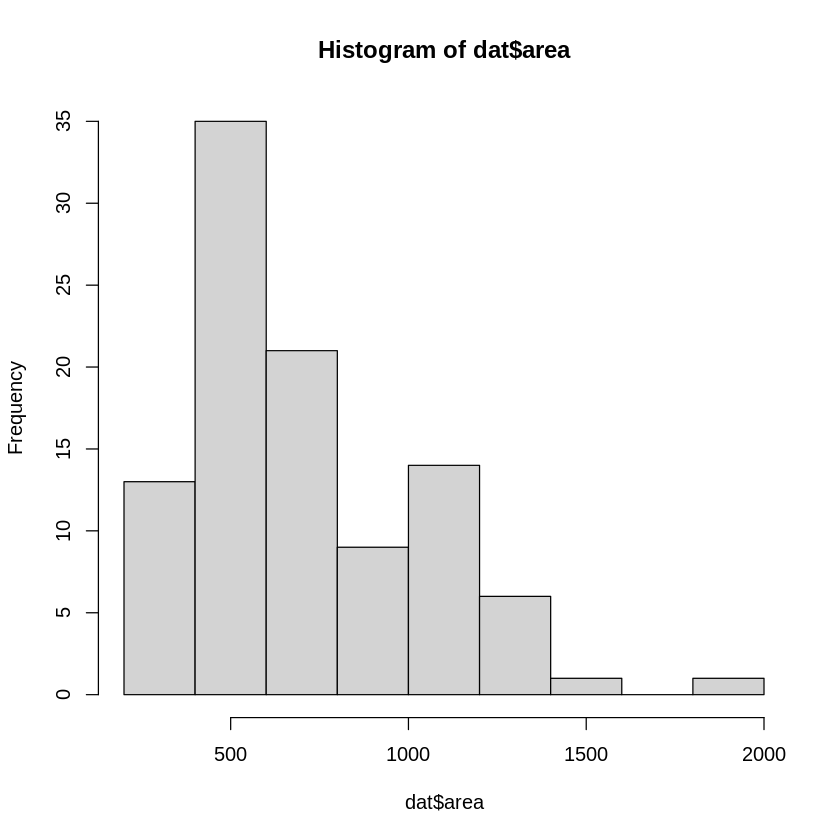

In [16]:
hist(dat$area)

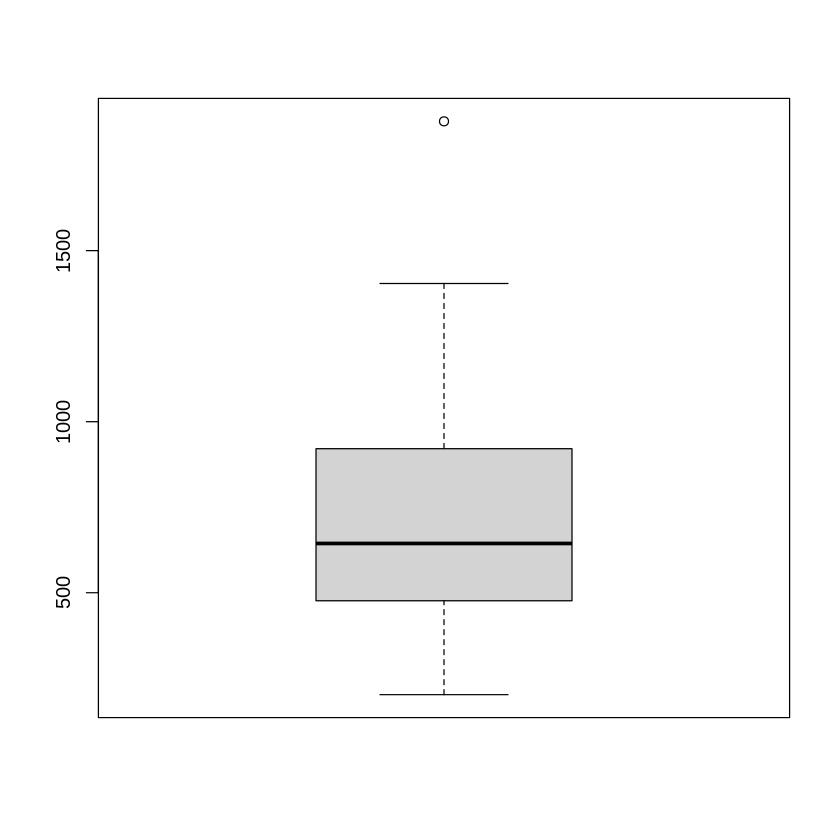

In [17]:
boxplot(dat$area)

Nuevamente asumiendo un circulo perfecto para el tumor, y apoyandonos de los valores mínimo y máximo del radio con la posible escala de milésimas, entonces el área para el valor mínimo del radio es $A = \pi*9^2 = 254.46$ mientras que el área para el valor máximo del radio es $A = \pi*25^2 = 1963.49$, como estos valores calculados para el área se acercan a los valores reales, entonces podemos concluir que el área se encuentra en la misma escala que la variable que representa el radio, es decir en milésimas.

### Variable: smoothness 

In [18]:
summary(dat$smoothness)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0700  0.0935  0.1020  0.1027  0.1120  0.1430 

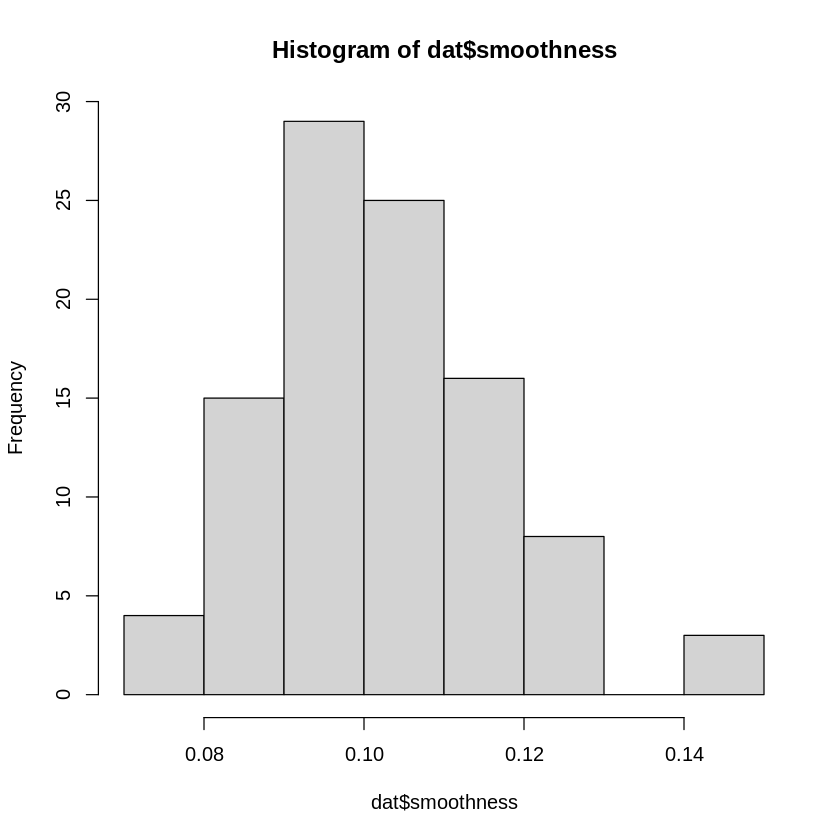

In [19]:
hist(dat$smoothness)

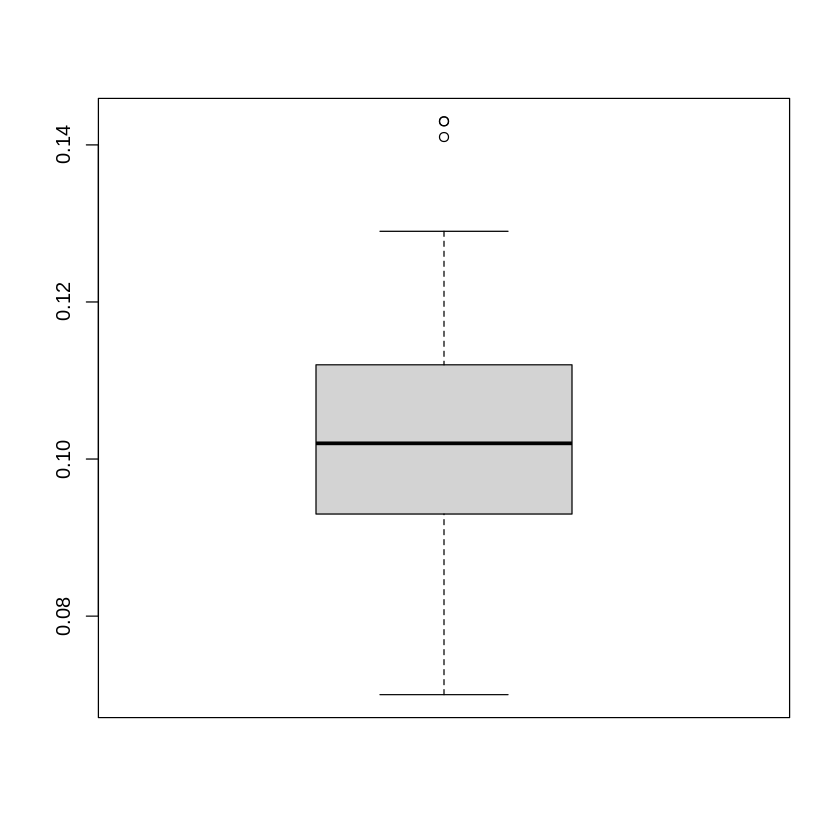

In [20]:
boxplot(dat$smoothness)

Dado que el rango de valores no baja de 0 y tampoco es mayor a 1, la escala parece estar en la unidades.

### Variable: compactness

In [21]:
summary(dat$compactness)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0380  0.0805  0.1185  0.1267  0.1570  0.3450 

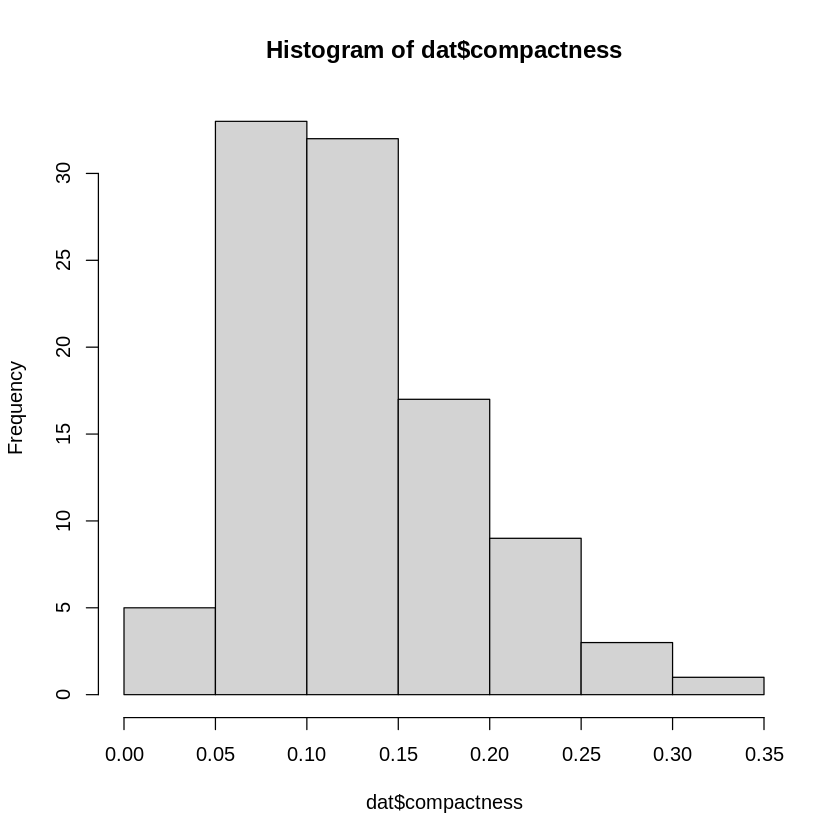

In [22]:
hist(dat$compactness)

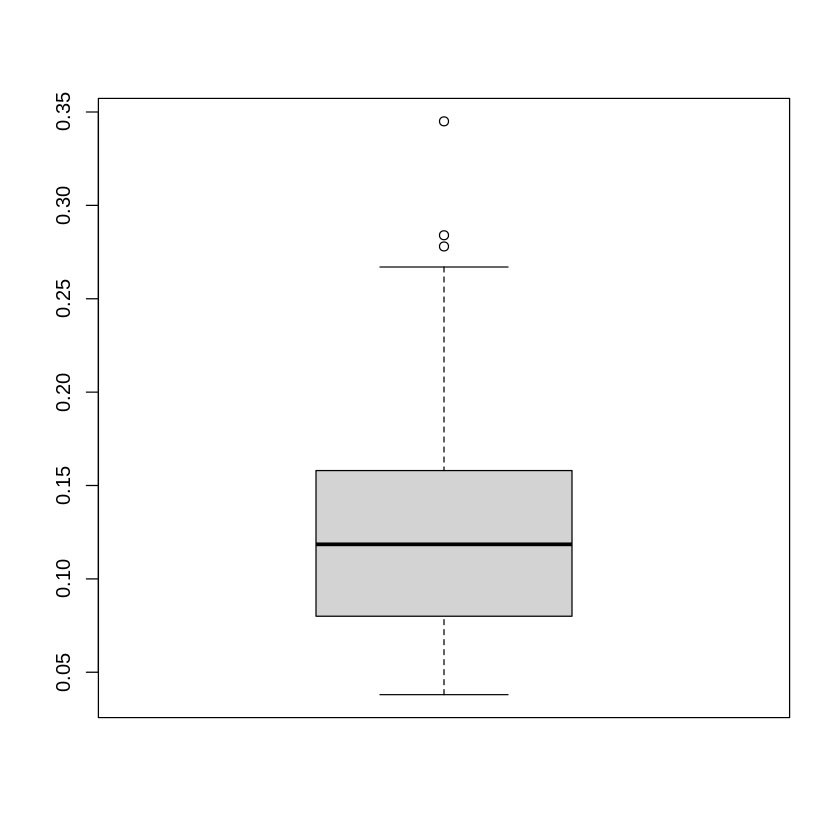

In [23]:
boxplot(dat$compactness)

De igual manera dado que el rango de valores no baja de 0 y tampoco es mayor a 1, la escala parece estar en la unidades.

### Variable: symmetry

In [24]:
summary(dat$symmetry)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1350  0.1720  0.1900  0.1932  0.2090  0.3040 

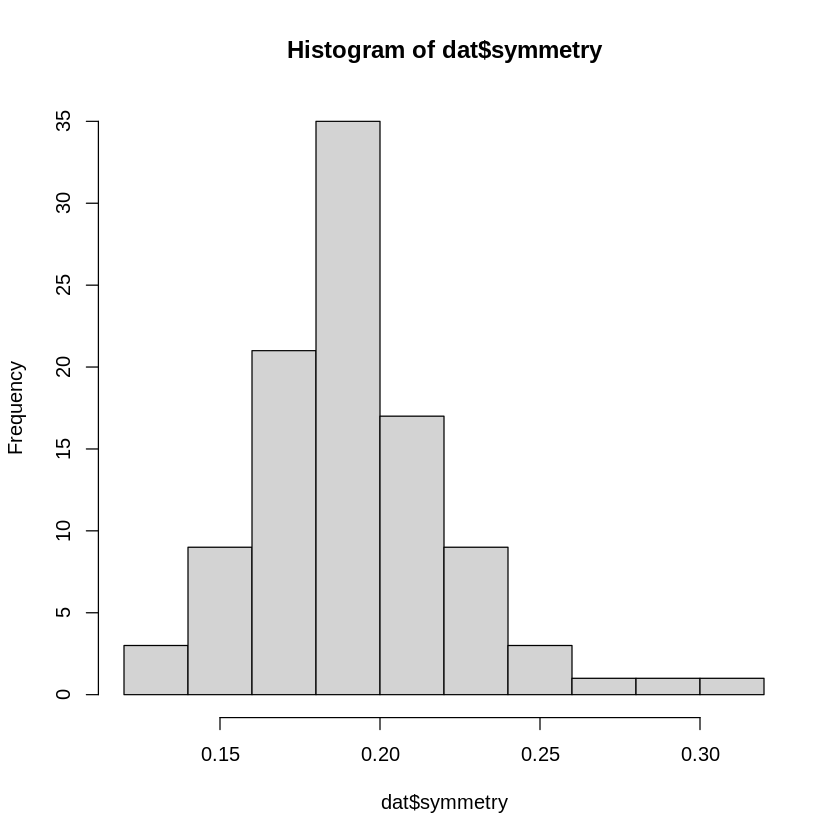

In [25]:
hist(dat$symmetry)

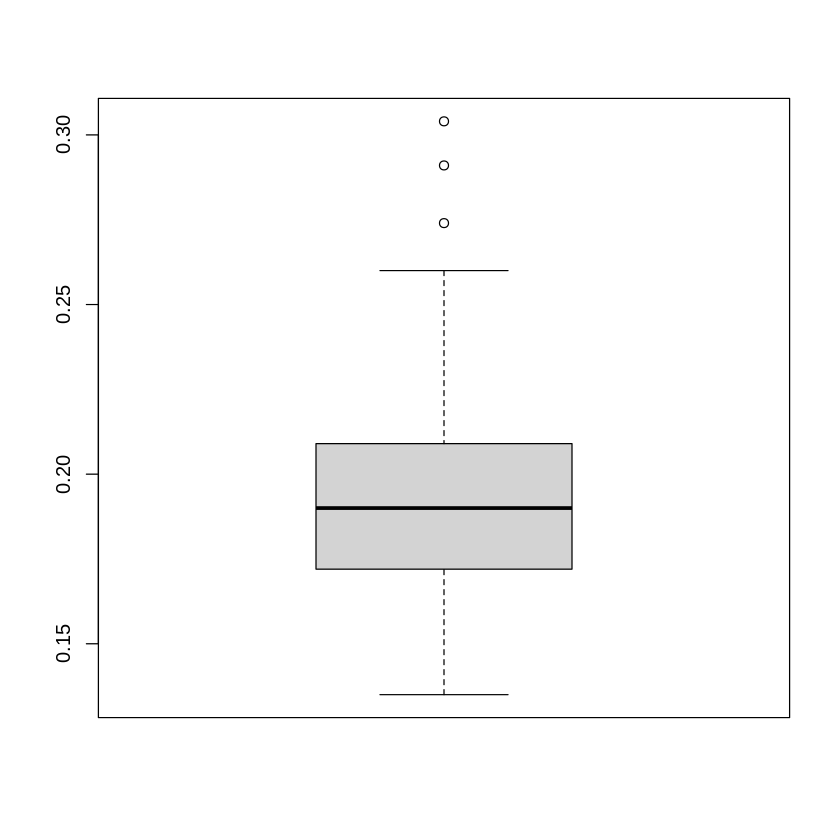

In [26]:
boxplot(dat$symmetry)

Si 1 representa total simetría y 0 nula simetría, entonces la escala para esta variable es de unidades.

### Variable: fractal_dimension

In [27]:
summary(dat$fractal_dimension)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.05300 0.05900 0.06300 0.06469 0.06900 0.09700 

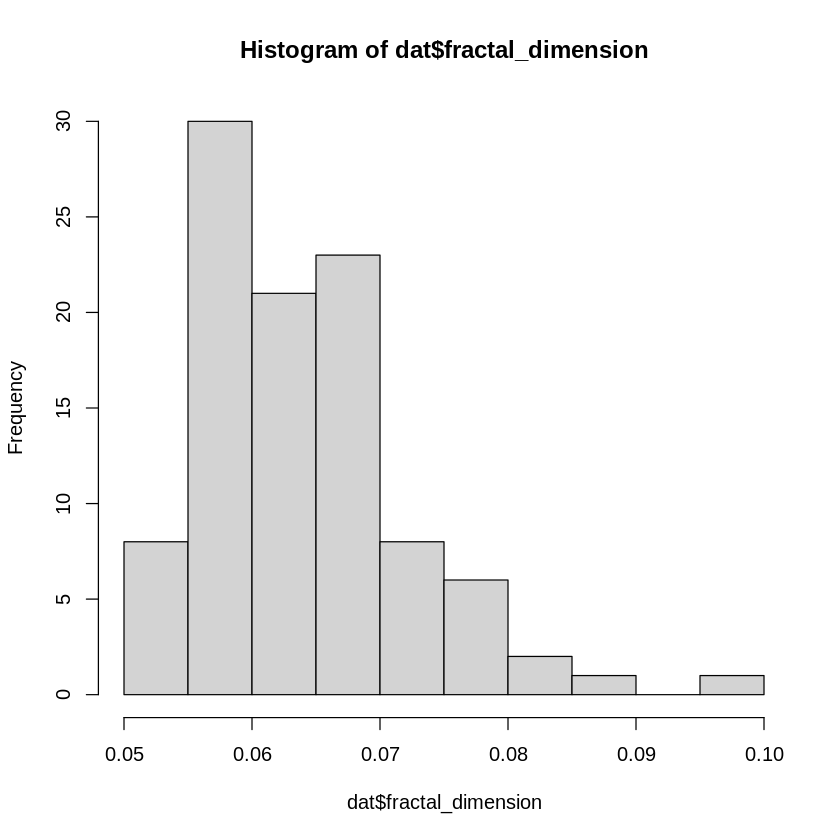

In [28]:
hist(dat$fractal_dimension)

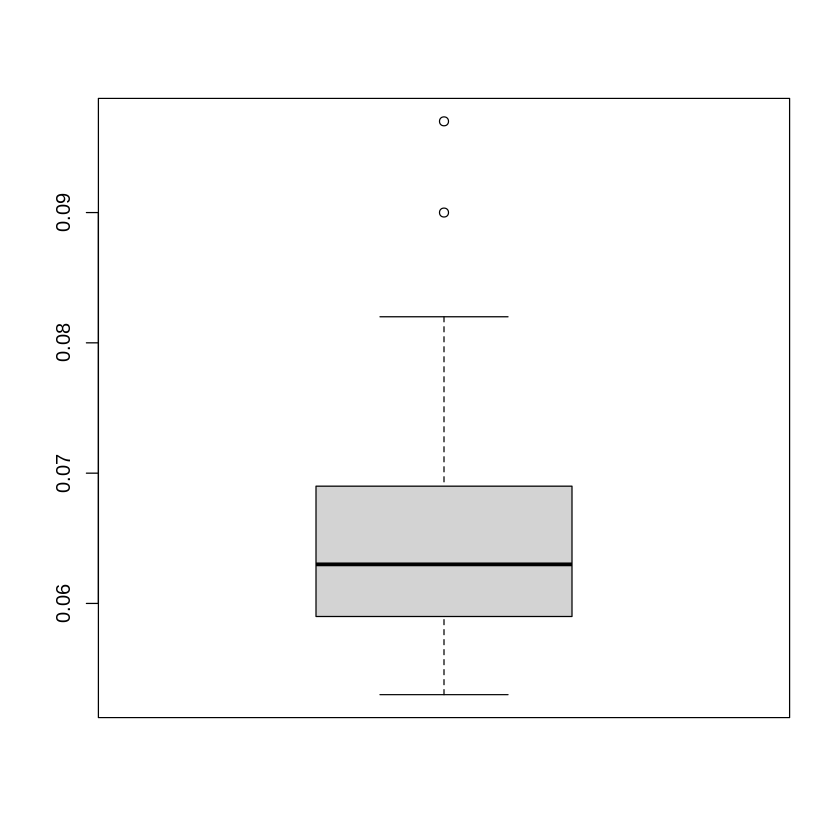

In [29]:
boxplot(dat$fractal_dimension)

Para esta variable vemos que el valor mínimo esta ligeramente encima del 0 y el valor máximo ligeramente abajo del 1, entonces la escala parece estar en la unidades.

## Clasificación.

### Variables sin estandarizar

Se almacenan en X todas las observaciones con solo los predictores y en Y todas las observaciones de la variable de respuesta.

In [30]:
X <- dat[, c("radius", "texture", "perimeter", "area", 
            "smoothness", "compactness", "symmetry", "fractal_dimension")]

Y <- dat$diagnosis_result 

De manera aleatoria se escoje un 70% de las observaciones para el conjunto de entrenamiento, de las observaciones restantes se escoje otro 15% para el conjunto de validación y el último 15% es para el conjunto de pruebas.

In [31]:
set.seed(0)

n <- nrow(dat)
inds <- 1:n

train_samp <- sample(inds, 0.7*n) 
valid_and_test_samp <- inds[-train_samp] 
valid_samp <- sample(valid_and_test_samp, 0.15*n)
test_samp <- valid_and_test_samp[!(valid_and_test_samp %in% valid_samp)] 

X_train <- X[train_samp, ]
Y_train <- Y[train_samp]
X_valid <- X[valid_samp, ]
Y_valid <- Y[valid_samp]
X_test <- X[test_samp, ]
Y_test <- Y[test_samp]

Para la clasificación con las variables sin estandarizar, estandarizadas y una posterior comparativa se utilizará un valor máximo para k de 50.

In [32]:
k_max = 50

Se revisa que valores de *k* son mejores para crear el modelo de clasificación, esto se realiza utilizando el conjunto de entrenamiento y el conjunto de validación.

[1] "1 ---> 0.8"
[1] "2 ---> 0.8"
[1] "3 ---> 0.866666666666667"
[1] "4 ---> 0.866666666666667"
[1] "5 ---> 0.933333333333333"
[1] "6 ---> 0.933333333333333"
[1] "7 ---> 0.933333333333333"
[1] "8 ---> 0.866666666666667"
[1] "9 ---> 0.866666666666667"
[1] "10 ---> 0.866666666666667"
[1] "11 ---> 0.933333333333333"
[1] "12 ---> 0.933333333333333"
[1] "13 ---> 0.933333333333333"
[1] "14 ---> 0.933333333333333"
[1] "15 ---> 0.933333333333333"
[1] "16 ---> 0.933333333333333"
[1] "17 ---> 0.933333333333333"
[1] "18 ---> 0.933333333333333"
[1] "19 ---> 0.933333333333333"
[1] "20 ---> 0.933333333333333"
[1] "21 ---> 0.933333333333333"
[1] "22 ---> 0.933333333333333"
[1] "23 ---> 0.933333333333333"
[1] "24 ---> 0.933333333333333"
[1] "25 ---> 0.933333333333333"
[1] "26 ---> 0.933333333333333"
[1] "27 ---> 0.933333333333333"
[1] "28 ---> 0.933333333333333"
[1] "29 ---> 0.933333333333333"
[1] "30 ---> 0.933333333333333"
[1] "31 ---> 0.933333333333333"
[1] "32 ---> 0.933333333333333"
[1] "33 ---> 

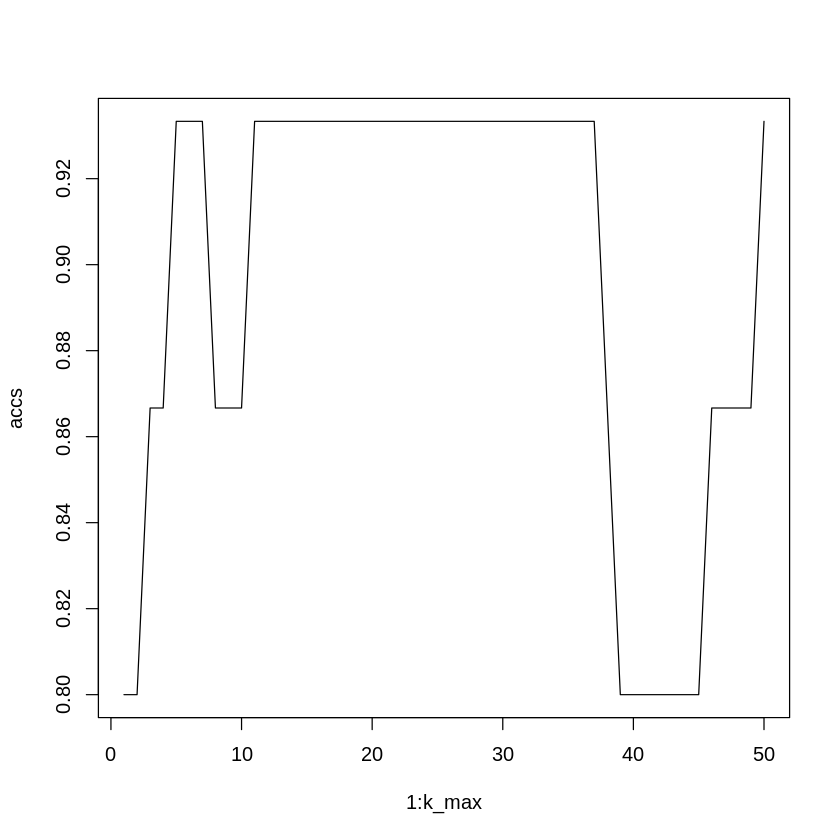

In [33]:
accs <- c()

for(k in 1:k_max){
    # Evaluamos sobre el conjunto de validación
    yp_valid <- knn(X_train, X_valid, Y_train, k=k)    
    acc <- sum(Y_valid==yp_valid)/length(yp_valid) 
    print(paste0(k, " ---> ",acc))
    accs <- c(accs,acc)
}

plot(1:k_max, accs, type = "l")

Se contruye un modelo con uno de los mejores valores de k encontrado en el paso anterior.

In [34]:
# Construimos el "modelo" con los datos de entrenamiento y validamos con el conjunto de prueba
yp_test <- knn(X_train, X_test, Y_train, k=20)
df <- data.frame(y=Y_test, yp=yp_test)

df

y,yp
<chr>,<fct>
M,B
M,M
M,B
M,B
M,B
M,M
M,B
M,M
B,B


In [35]:
# Medimos la exactitud
sum(df$y==df$yp) / nrow(df)

[1] 0.6666667

A pesar de que en la gráfica para k = 20 se observa una exactitud muy alta, al construir nuevamente el modelo para el mismo valor de k con los datos de entrenamiento y  el conjunto de prueba, la exactitud ya no es tan alta, esto se explica porque la exactitud de la grafica anterior se obtuvo a partir del conjunto de entrenamiento y el conjunto de validación.

### Variables estandarizadas

Con el apoyo del conjunto de datos de entrenamiento se revisa que las variables aun no estan estandarizadas.

In [36]:
summary(X_train)

     radius         texture        perimeter           area       
 Min.   : 9.00   Min.   :11.00   Min.   : 52.00   Min.   : 202.0  
 1st Qu.:12.50   1st Qu.:14.00   1st Qu.: 81.50   1st Qu.: 482.5  
 Median :17.00   Median :17.00   Median : 94.00   Median : 645.5  
 Mean   :16.91   Mean   :18.21   Mean   : 96.74   Mean   : 704.8  
 3rd Qu.:21.00   3rd Qu.:23.00   3rd Qu.:112.25   3rd Qu.: 903.5  
 Max.   :25.00   Max.   :27.00   Max.   :172.00   Max.   :1878.0  
   smoothness      compactness         symmetry      fractal_dimension
 Min.   :0.0740   Min.   :0.03800   Min.   :0.1350   Min.   :0.05300  
 1st Qu.:0.0920   1st Qu.:0.07725   1st Qu.:0.1720   1st Qu.:0.05725  
 Median :0.0990   Median :0.10800   Median :0.1885   Median :0.06300  
 Mean   :0.1021   Mean   :0.12047   Mean   :0.1897   Mean   :0.06396  
 3rd Qu.:0.1080   3rd Qu.:0.14875   3rd Qu.:0.2080   3rd Qu.:0.06800  
 Max.   :0.1430   Max.   :0.34500   Max.   :0.2910   Max.   :0.09000  

Se escalan las variables para los 3 conjuntos de datos; de entrenamiento, de validación y de prueba.

In [37]:
X_train_stand <- scale(X_train)
X_valid_stand <- scale(X_valid)
X_test_stand <- scale(X_test)

A continuación se corrobora solo para las variables del conjunto de datos de entrenamiento que estas ya se encuentran estandarizadas.

In [38]:
summary(X_train_stand)

     radius            texture          perimeter            area        
 Min.   :-1.64071   Min.   :-1.3571   Min.   :-1.8014   Min.   :-1.5185  
 1st Qu.:-0.91513   1st Qu.:-0.7928   1st Qu.:-0.6137   1st Qu.:-0.6713  
 Median : 0.01777   Median :-0.2284   Median :-0.1104   Median :-0.1790  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.84701   3rd Qu.: 0.9003   3rd Qu.: 0.6243   3rd Qu.: 0.6002  
 Max.   : 1.67625   Max.   : 1.6528   Max.   : 3.0299   Max.   : 3.5434  
   smoothness       compactness         symmetry        fractal_dimension
 Min.   :-1.9615   Min.   :-1.3870   Min.   :-1.92661   Min.   :-1.4422  
 1st Qu.:-0.7037   1st Qu.:-0.7269   1st Qu.:-0.62342   1st Qu.:-0.8828  
 Median :-0.2146   Median :-0.2097   Median :-0.04227   Median :-0.1260  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.4143   3rd Qu.: 0.4756   3rd Qu.: 0.64455   3rd Qu.: 0.5321  
 Max.   : 2.8598   Max.   : 3.7760   M

Se revisa que valores de *k* son mejores para crear el modelo de clasificación, esto se realiza utilizando el conjunto de entrenamiento y el conjunto de validación.

[1] "1 ---> 0.866666666666667"
[1] "2 ---> 0.866666666666667"
[1] "3 ---> 0.8"
[1] "4 ---> 0.733333333333333"
[1] "5 ---> 0.8"
[1] "6 ---> 0.866666666666667"
[1] "7 ---> 0.8"
[1] "8 ---> 0.8"
[1] "9 ---> 0.8"
[1] "10 ---> 0.866666666666667"
[1] "11 ---> 0.866666666666667"
[1] "12 ---> 0.866666666666667"
[1] "13 ---> 0.866666666666667"
[1] "14 ---> 0.866666666666667"
[1] "15 ---> 0.866666666666667"
[1] "16 ---> 0.866666666666667"
[1] "17 ---> 0.933333333333333"
[1] "18 ---> 0.933333333333333"
[1] "19 ---> 0.866666666666667"
[1] "20 ---> 0.8"
[1] "21 ---> 0.8"
[1] "22 ---> 0.8"
[1] "23 ---> 0.866666666666667"
[1] "24 ---> 0.8"
[1] "25 ---> 0.8"
[1] "26 ---> 0.8"
[1] "27 ---> 0.8"
[1] "28 ---> 0.8"
[1] "29 ---> 0.866666666666667"
[1] "30 ---> 0.8"
[1] "31 ---> 0.866666666666667"
[1] "32 ---> 0.866666666666667"
[1] "33 ---> 0.866666666666667"
[1] "34 ---> 0.8"
[1] "35 ---> 0.8"
[1] "36 ---> 0.733333333333333"
[1] "37 ---> 0.8"
[1] "38 ---> 0.866666666666667"
[1] "39 ---> 0.8"
[1] "40 ---> 

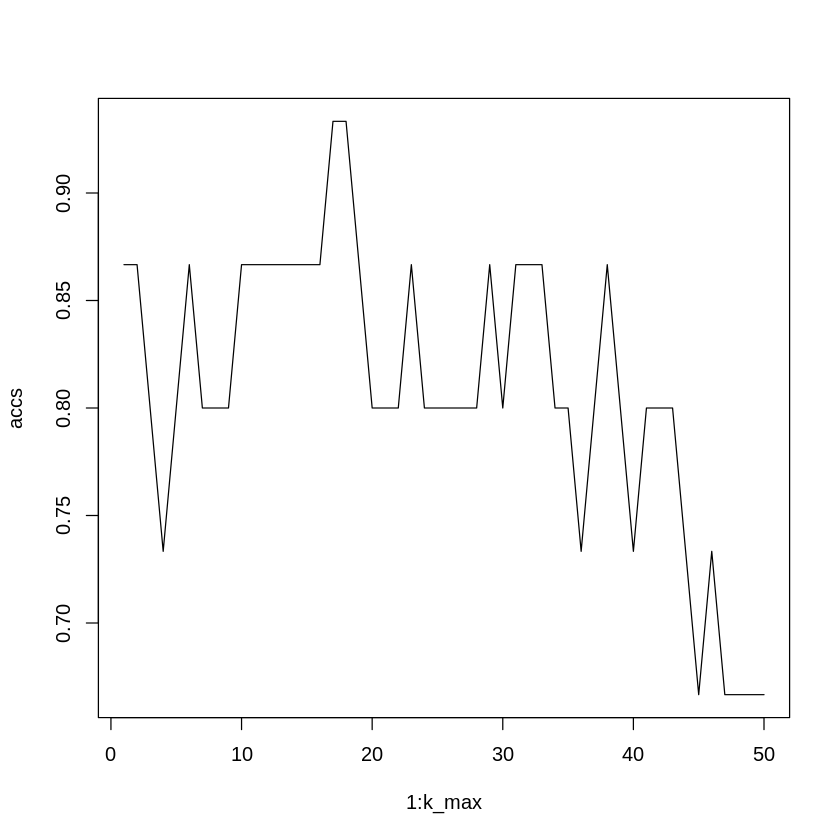

In [39]:
accs <- c()

for(k in 1:k_max){
    # Evaluamos sobre el conjunto de validación.
    # Observar que se estan utilizando los conjuntos de datos estandarizados.
    yp_valid <- knn(X_train_stand, X_valid_stand, Y_train, k=k)    
    acc <- sum(Y_valid==yp_valid)/length(yp_valid) 
    print(paste0(k, " ---> ",acc))
    accs <- c(accs,acc)
}

plot(1:k_max, accs, type = "l")

Se contruye un modelo con el mejor valor de k encontrado anteriormente.

In [40]:
# Construimos el "modelo" con los datos de entrenamiento y validamos con el conjunto de prueba
yp_test <- knn(X_train_stand, X_test_stand, Y_train, k=18)
df <- data.frame(y=Y_test, yp=yp_test)

df

y,yp
<chr>,<fct>
M,M
M,M
M,M
M,M
M,M
M,M
M,B
M,M
B,B


In [41]:
# Medimos la exactitud
sum(df$y==df$yp) / nrow(df)

[1] 0.9333333

Como se puede observar en el resultado anterior, la exactitud resultó alta para un valor de k = 18.

### Comparativa

A continuación se muestra el resultado de la exactitud promedio que da el método de los *k* vecinos más cercanos (KNN) utilizando las mismas observaciones en los diferentes conjuntos (de entrenamiento y de prueba) con la diferencia de que en unos conjuntos las variables no estan estandarizadas mientras que en los otros si lo estan, para ello se pone a prueba el método  KNN con valores de *k* que van desde 1 hasta 50 (k_max).

In [42]:
accs <- c()
accs_stand <- c()

max_acc = 0
max_acc_stand = 0

for(k in 1:k_max){
    # En ambos casos se evalua con el conjunto de prueba.

    # Uso de las variables no estandarizadas.
    yp_test <- knn(X_train, X_test, Y_train, k=k)    
    acc <- sum(Y_test==yp_test)/length(yp_test) 
    max_acc = ifelse(acc > max_acc, acc, max_acc)
    accs <- c(accs, acc)

    # Uso de las variables estandarizadas.
    yp_test_stand <- knn(X_train_stand, X_test_stand, Y_train, k=k)    
    acc_stand <- sum(Y_test==yp_test_stand)/length(yp_test_stand) 
    max_acc_stand = ifelse(acc_stand > max_acc_stand, acc_stand, max_acc_stand)
    accs_stand <- c(accs_stand, acc_stand)
}

print(paste0('Exactitud promedio con variables no estandarizadas: ', mean(accs)))
print(paste0('Exactitud promedio con variables estandarizadas: ', mean(accs_stand)))

[1] "Exactitud promedio con variables no estandarizadas: 0.729333333333333"
[1] "Exactitud promedio con variables estandarizadas: 0.862666666666667"


In [43]:
print(paste0('Exactitud máxima usando las variables sin estandarizar: ', max_acc))
print(paste0('Exactitud máxima usando las variables estandarizadas: ', max_acc_stand))

[1] "Exactitud máxima usando las variables sin estandarizar: 0.866666666666667"
[1] "Exactitud máxima usando las variables estandarizadas: 0.933333333333333"


A continuación se muestra la gráfica de las exactitudes que se obtuvieron para cada valor de k en ambos casos evaluados.

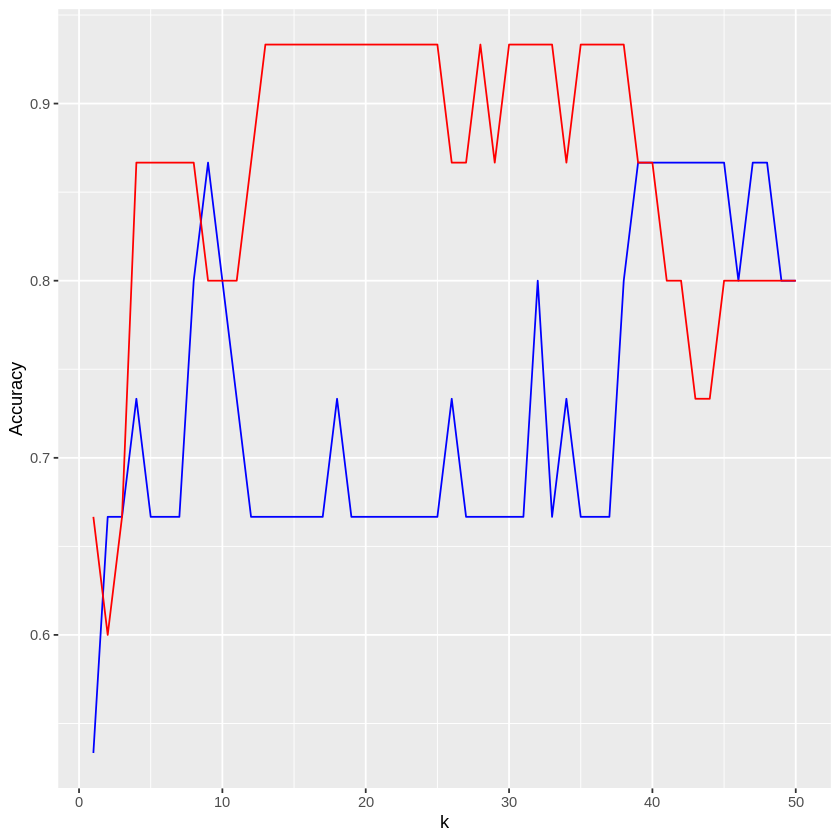

In [44]:
seq <- 1:k_max
df1 <- data.frame(seq, accs)
df2 <- data.frame(seq, accs_stand)

ggplot() + 
    geom_line(data = df1, aes(x = seq, y = accs), color = "blue") +
    geom_line(data = df2, aes(x = seq, y = accs_stand), color = "red") +
    xlab('k') +
    ylab('Accuracy')

La linea azul muestra las exactitudes que se obtienen utilizando las variables sin estandarizar, mientras que la linea roja muestra las exactitudes que se obtienen utilizando las variables estandarizadas. Como se puede apreciar en la gráfica, las exactitudes utilizando las variables estandarizadas prevalecen más en valores altos.

## Conclusiones.

De la comparativa anterior, donde la exactitud promedio con las variables no estandarizadas es de aproximadamente 0.73, mientras la exactitud promedio con las variables estandarizadas es de aproximadamente 0.86, ademas con las variables estandarizadas fue donde se obtuvo la mayor exactitud con un valor de 0.93 para $14 \le k \le 25$. Con los datos anteriores se puede concluir que estandarizar las variables antes de empezar a realizar la clasificación es un paso importante a llevar a cabo para obtener un mejor resultado en la clasificación.